In [1]:
using DelimitedFiles

In [2]:
A = readdlm("admission.txt", ',')

100×3 Array{Float64,2}:
 34.6237  78.0247  0.0
 30.2867  43.895   0.0
 35.8474  72.9022  0.0
 60.1826  86.3086  1.0
 79.0327  75.3444  1.0
 45.0833  56.3164  0.0
 61.1067  96.5114  1.0
 75.0247  46.554   1.0
 76.0988  87.4206  1.0
 84.4328  43.5334  1.0
 95.8616  38.2253  0.0
 75.0137  30.6033  0.0
 82.3071  76.482   1.0
  ⋮                
 78.6354  96.6474  1.0
 52.348   60.7695  0.0
 94.0943  77.1591  1.0
 90.4486  87.5088  1.0
 55.4822  35.5707  0.0
 74.4927  84.8451  1.0
 89.8458  45.3583  1.0
 83.4892  48.3803  1.0
 42.2617  87.1039  1.0
 99.315   68.7754  1.0
 55.34    64.9319  1.0
 74.7759  89.5298  1.0

In [3]:
y = A[:,3]

100-element Array{Float64,1}:
 0.0
 0.0
 0.0
 1.0
 1.0
 0.0
 1.0
 1.0
 1.0
 1.0
 0.0
 0.0
 1.0
 ⋮
 1.0
 0.0
 1.0
 1.0
 0.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [4]:
N = length(y)

100

In [7]:
positive = (y .== 1)
negative = (y .== 0)

100-element BitArray{1}:
 1
 1
 1
 0
 0
 1
 0
 0
 0
 0
 1
 1
 0
 ⋮
 0
 1
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0

In [8]:
using Plots

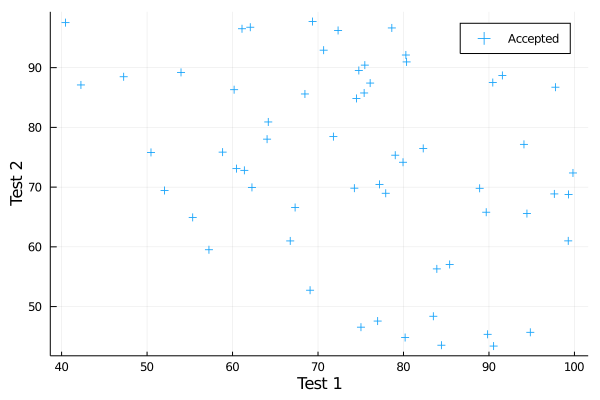

In [12]:
plot(A[positive, 1], A[positive, 2], st=:scatter, m=:+, label="Accepted", xlabel="Test 1", ylabel="Test 2")

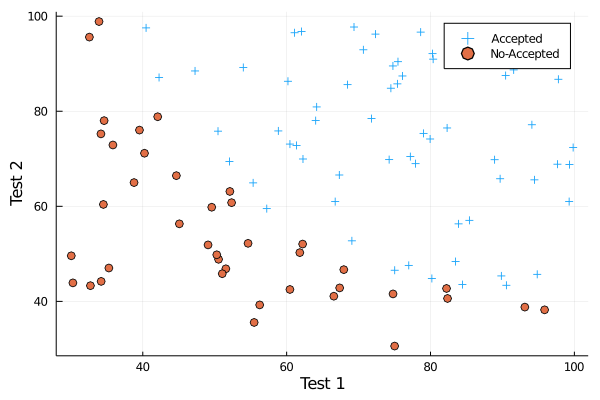

In [13]:
plot!(A[negative, 1], A[negative, 2], st=:scatter, m=:o, label="No-Accepted")

In [16]:
X = [ones(N) A[:, 1:2]]

100×3 Array{Float64,2}:
 1.0  34.6237  78.0247
 1.0  30.2867  43.895
 1.0  35.8474  72.9022
 1.0  60.1826  86.3086
 1.0  79.0327  75.3444
 1.0  45.0833  56.3164
 1.0  61.1067  96.5114
 1.0  75.0247  46.554
 1.0  76.0988  87.4206
 1.0  84.4328  43.5334
 1.0  95.8616  38.2253
 1.0  75.0137  30.6033
 1.0  82.3071  76.482
 ⋮             
 1.0  78.6354  96.6474
 1.0  52.348   60.7695
 1.0  94.0943  77.1591
 1.0  90.4486  87.5088
 1.0  55.4822  35.5707
 1.0  74.4927  84.8451
 1.0  89.8458  45.3583
 1.0  83.4892  48.3803
 1.0  42.2617  87.1039
 1.0  99.315   68.7754
 1.0  55.34    64.9319
 1.0  74.7759  89.5298

In [75]:
σ(z) = 1 ./ (1 + exp.(-z))

σ (generic function with 1 method)

In [76]:
θ_0 = zeros(3)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [142]:
σ(0)

0.5

In [77]:
σ(X[1,:]' * θ_0)

0.5

In [78]:
θ_1 = rand(3)

3-element Array{Float64,1}:
 0.6999147825632834
 0.6380761576051301
 0.5921887441050904

In [79]:
σ(X[1,:]' * θ_1)

1.0

In [80]:
function J(X, y, θ)
    u = σ.(X * θ)
    J = y' * log.(u) + (1 .- y)' * log.(1 .- u)
    N = length(y)
    -J/N
end

J (generic function with 1 method)

In [81]:
J(X, y, θ_0)

0.6931471805599453

In [82]:
J(X, y, θ_1)

NaN

In [104]:
function gradient(X, y, θ)::Array{Float64}
    u = σ.(X * θ)
    N = length(y)
    X' * (u - y) / N
end

gradient (generic function with 1 method)

In [105]:
gradient(X, y, zeros(3))

3-element Array{Float64,1}:
  -0.1
 -12.009216589291155
 -11.262842205513593

In [106]:
function gradientDescent(X, y, θ_0, α=0.1, T=100)
    θs = [θ_0]
    θ = θ_0
    for t = 1 : T
        ∇ = gradient(X, y, θ) # \nabla
        θ = θ - α * ∇
        push!(θs, θ)
    end
    θs
end

gradientDescent (generic function with 3 methods)

In [120]:
T = 10000

10000

In [121]:
θs = gradientDescent(X, y, θ_0, 0.001, T)

10001-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0]
 [0.0001, 0.012009216589291155, 0.011262842205513593]
 [-0.0001182092071324009, 0.0024758289162126277, 0.0009052241105959886]
 [-7.353481483942055e-5, 0.010625984225112654, 0.008433071113338287]
 [-0.00024877277228647774, 0.0038868633260201466, 0.000987876726922631]
 [-0.00022806166984917764, 0.010338286847495281, 0.006925776004848418]
 [-0.00038262559374718265, 0.0049310413542748375, 0.0009122799990842183]
 [-0.00037718638049295664, 0.010289436948554515, 0.005847963080140928]
 [-0.0005180185323069516, 0.005759490970300833, 0.0007978997991774928]
 [-0.0005236730908912124, 0.010319518473309136, 0.005010460771885659]
 [-0.0006542996730079567, 0.0064377133519059465, 0.0006826941520177978]
 [-0.0006685908258335698, 0.010374629677447914, 0.004334335838919887]
 [-0.0007911602970088194, 0.00700263085360136, 0.000580073989114437]
 ⋮
 [-0.6682612951301661, 0.015086554814987876, 0.005656868446748269]
 [-0.6683253646260349, 0.0150870043177

In [122]:
Js = map(t -> J(X, y, θs[t]), 1:T)

10000-element Array{Float64,1}:
 0.6931471805599453
 0.6982906893667756
 0.6597117632164304
 0.6616272696122697
 0.6488615344619068
 0.6496960933384357
 0.6431098658230963
 0.643465208403156
 0.6395252291304567
 0.6396433985595571
 0.6370958143658065
 0.6370920319486808
 0.635363941186405
 ⋮
 0.5850767590291767
 0.5850726536237478
 0.5850685482888329
 0.585064443024431
 0.5850603378305403
 0.5850562327071602
 0.5850521276542888
 0.5850480226719249
 0.5850439177600676
 0.5850398129187151
 0.5850357081478664
 0.58503160344752

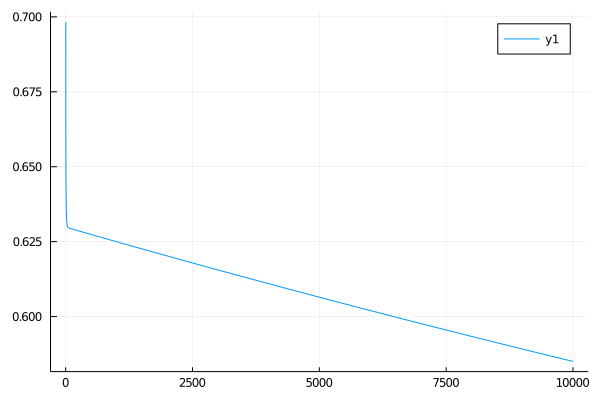

In [123]:
plot(1:T, Js)

In [124]:
θ_best = θs[T]

3-element Array{Float64,1}:
 -0.6689019653290107
  0.015091049692187797
  0.005661870157399378

In [125]:
function classify(x, θ_best)
    score = x' * θ_best
    if (score >= 0) 1 else 0 end
end

classify (generic function with 1 method)

In [126]:
y_ = map(i -> classify(X[i, :], θ_best), 1:N)

100-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [127]:
accuracy = sum(y_ .== y) / N

0.6

In [128]:
using Optim

In [138]:
result = Optim.optimize(θ -> J(X, y, θ), zeros(3))

 * Status: success

 * Candidate solution
    Final objective value:     2.034977e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    118
    f(x) calls:    219


In [139]:
θ_meilleur = Optim.minimizer(result)

3-element Array{Float64,1}:
 -25.162619257493436
   0.2062426158179525
   0.20147741047915213

In [140]:
prediction = map(i -> classify(X[i, :], θ_meilleur), 1:N)

100-element Array{Int64,1}:
 0
 0
 0
 1
 1
 0
 1
 0
 1
 1
 1
 0
 1
 ⋮
 1
 0
 1
 1
 0
 1
 1
 1
 1
 1
 0
 1

In [141]:
acc = sum(prediction .== y) / N

0.89